# **Telco Customer Churn Prediction**

URL : https://telcochurn-prediction-frontend.herokuapp.com/

Pada kesempatan kali akan dilakukan pemodelan untuk prediksi Churn di Telco. Data yang didapat berisi tentang profil Customer yang menggunakan jasa Telco. Profil tersebut mencakup gender, partnership, jenis kabel yang digunakan, paket-paket apa saja yang digunakan, jenis kontrak yang diambil, dan lain-lain. Berikut adalah keterangan pada data ini :

- customerID    : Unique ID of each customer<br>
- gender        : Whether the customer is a male or a female<br>
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)<br>
- Partner       : Whether the customer has a partner or not (Yes, No)<br>
- Dependents    : Whether the customer has dependents or not (Yes, No)<br>
- tenure        : Number of months the customer has stayed with the company<br>
- PhoneService  : Whether the customer has a phone service or not (Yes, No)<br>
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)<br>
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)<br>
- OnlineBackup  : Whether the customer has online backup or not (Yes, No, No internet service)<br>
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)<br>
- TechSupport   : Whether the customer has tech support or not (Yes, No, No internet service)<br>
- StreamingTV   : Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
- Contract      : The contract term of the customer (Month-to-month, One year, Two year)<br>
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)<br>
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
- MonthlyCharge : The amount charged to the customer monthly<br>
- TotalCharges  : The total amount charged to the customer<br>
-------

## **IMPORT PUSTAKA**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy import stats
from imblearn.over_sampling import SMOTE
import pickle

Import pustaka yang akan digunakan pada analisa dataset ini

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Load data dan menyimpan ke dalam variabel df

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


----
## **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Memeriksa tipe data dari masing-masing kolom dan sekilas melihat apakah ada missing values. Bisa dilihat kalau kolom TotalCharges bertipe object padahal datanya angka float semua. Untuk SeniorCitizen akan diproses menjadi object lalu diubah valuenya menjadi Yes dan No pada Data Preprocessing

In [83]:
for col in df.columns:
    if(df[col].dtypes == 'object'): 
            print('column :', col, 'Unique values :', df[col].unique())

column : SeniorCitizen Unique values : ['No' 'Yes']
column : Partner Unique values : ['Yes' 'No']
column : Dependents Unique values : ['No' 'Yes']
column : PhoneService Unique values : ['No' 'Yes']
column : MultipleLines Unique values : ['No' 'Yes']
column : InternetService Unique values : ['DSL' 'Fiber optic' 'No']
column : OnlineSecurity Unique values : ['No' 'Yes']
column : OnlineBackup Unique values : ['Yes' 'No']
column : DeviceProtection Unique values : ['No' 'Yes']
column : TechSupport Unique values : ['No' 'Yes']
column : StreamingTV Unique values : ['No' 'Yes']
column : StreamingMovies Unique values : ['No' 'Yes']
column : Contract Unique values : ['Month-to-month' 'One year' 'Two year']
column : PaperlessBilling Unique values : ['Yes' 'No']
column : PaymentMethod Unique values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Melihat unique values setiap kolom.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Proses mengubah type data dari TotalCharges menjadi Float

In [7]:
df.loc[df['MultipleLines']== 'No phone service', 'MultipleLines'] = 'No'

Setelah melihat isian dari dataset, untuk value yang berisi "No phone service" pada intinya adalah No. Maka diubah valuenya menjadi No untuk menghindari adanya keanehan karena encoding.

In [8]:
df.replace('No internet service', 'No', inplace=True)

Seperti catatan hal sebelumnya, akan dilakukan hal yang sama pada isian "No internet service".

In [9]:
df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'},inplace=True)

Proses mengubah value SeniorCitizen menjadi Yes dan No

In [10]:
df['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

Churn yang akan menjadi target akan diubah menjadi binary 1 0 (1=Yes, 0=No).

----

### **1. Berapa jumlah data berdasarkan gender dan churn ?**

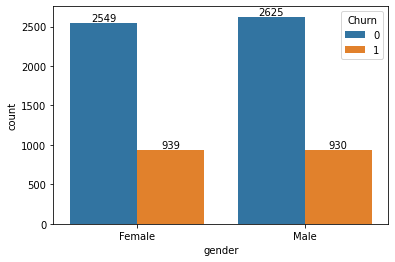

In [11]:
a1 = sns.countplot(x='gender', data=df, hue='Churn')
for container in a1.containers:
    a1.bar_label(container)

> Pada dataset ini jumlah customer pria maupun wanita hampir sama dengan jumlah pria sedikit lebih banyak. Untuk churn juga jumlahnya sama pada pria maupun wanita

----

### **2. Bagaimana gambaran awal data Monthly Charges dan TotalCharges ?**

<AxesSubplot:xlabel='TotalCharges'>

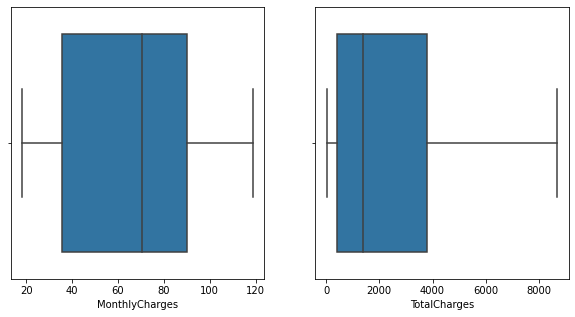

In [12]:
fig = plt.figure(figsize=(10,5))
row = 1
col = 2

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(x=df['MonthlyCharges'])

fig.add_subplot(row, col, 2)
sns.boxplot(x=df['TotalCharges'])

> Pada MonthlyCharges terlihat datanya hampir bisa dibilang terdistribusi normal, tidak seperti TotalCharges yang terlihat right skewed. Untuk dua kolom tersebut terlihat tidak ada outliers.

---

### **3. Bagaimana sebaran data Monthly Charges dan TotalCharges ?**

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

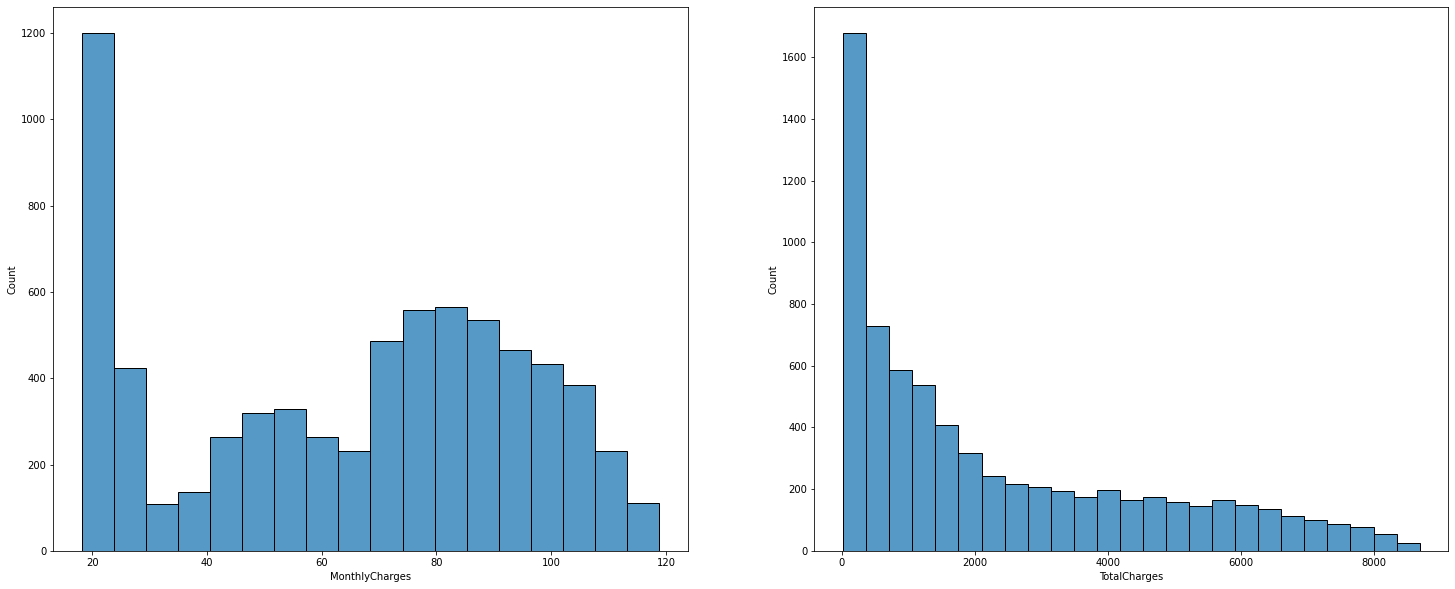

In [13]:
fig = plt.figure(figsize=(25,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
sns.histplot(x=df['MonthlyCharges'])

fig.add_subplot(row, col, 2)
sns.histplot(x=df['TotalCharges'])

> Terdapat kesamaan dari 2 kolom tersebut yaitu yang paling banyak terdapat di nilai yang terendah. Pada MonthlyCharges selain banyak yang mengambil bayaran terendah, orang-orang terlihat banyak yang memilih bulanan sebesar 70-90. Kalau untuk TotalCharges, terlihat semakin besar angkanya semakin sedikit jumlahnya entah karena banyak yang baru bergabung atau banyak yang berhenti ketika belum lama bergabung.

---

### **4. Apakah lebih banyak orang yang Churn pada dataset ini ?**

<AxesSubplot:xlabel='Churn', ylabel='count'>

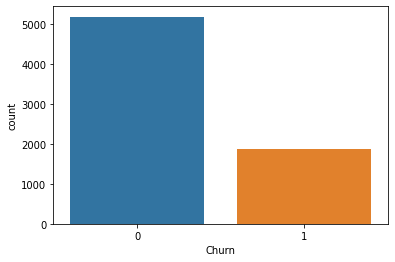

In [14]:
sns.countplot(x='Churn', data=df)

> Pada dataset ini lebih banyak data yang tidak Churn. Dari barplot diatas terlihat datanya imbalance untuk yang yes dan no pada kolom churn ini akan mempengaruhi pemodelan pada prediksi churn.

---

### **5. Apakah status partnership dan tipe kabel yang digunakan mempengaruhi Churn ?**

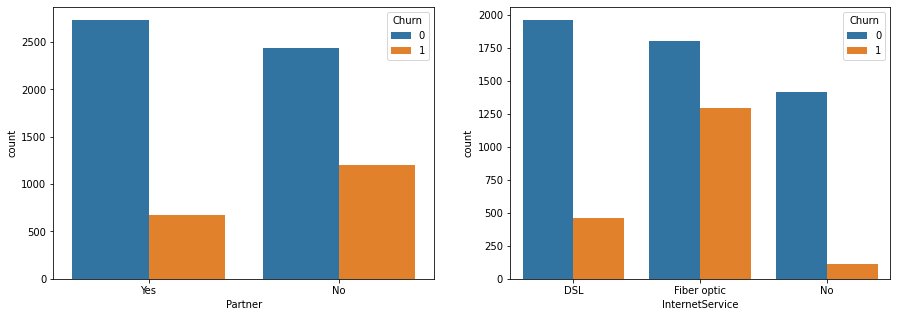

In [15]:
fig = plt.figure(figsize=(15,5))
row = 1
col = 2

fig.add_subplot(row, col, 1)
ax = sns.countplot(x= 'Partner', hue='Churn', data=df)
# ax.set_title(f'Effect of Partner on Customer Churn');

fig.add_subplot(row, col, 2)
ax2 = sns.countplot(x= 'InternetService', hue='Churn', data=df)

> Status partnership cukup mempengaruhi churn, jumlah yang bukan partner dan churn hampir setengah dari yang tidak churn dan juga jumlahnya lebih banyak dibandingkan churn yang partner.

----

### **6. Apakah contract dan tenure berpengaruh terhadap churn?**

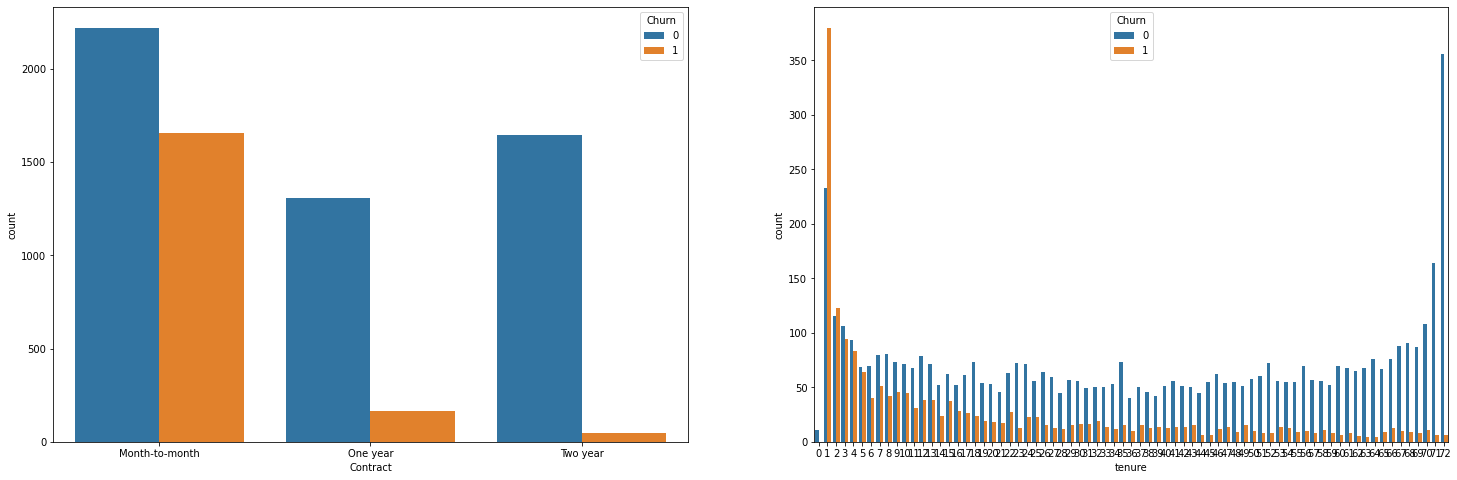

In [16]:
fig = plt.figure(figsize=(25,8))
row = 1
col = 2

fig.add_subplot(row, col, 1)
ax = sns.countplot(x= 'Contract', hue='Churn', data=df)
# ax.set_title(f'Effect of Partner on Customer Churn');

fig.add_subplot(row, col, 2)
ax2 = sns.countplot(x= 'tenure', hue='Churn', data=df)

> Status contract terlihat berpengaruh pada churn. Semakin berkomitmen panjang dengan kontraknya maka semakin jauh lebih sedikit yang churn. Pada tenure yang diambil oleh customer terlihat hampir mirip dengan contract karena semakin panjang tenurenya semakin orang-orang tidak churn. Tenure 1-2 menjadi tenure yang terbanyak churn, diasumsikan banyak customer yang baru mencoba-coba lalu tidak cocok sehingga churn.

<AxesSubplot:>

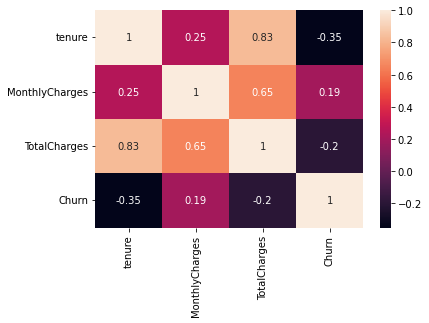

In [17]:
sns.heatmap(df.corr(), annot=True)

Berdasarkan heatmap korelasi antar kolom numerik diatas bisa kita liat kolom-kolom lumayan berkorelasi. Tenure dan total charges adalah kolom yang paling berkorelasi.

-----

## **DATA PREPROCESSING**

In [18]:
def check_chisquare(data):
    print('========= P-Value =========')
    for i in data :
        if data[i].dtypes == 'O' :
            p = stats.chisquare(data[i].value_counts())[1]
            print(i,':', p)
    print('========= P-Value =========')
    # return df_chisquare

Membuat function check_chisquare untuk persiapan memeriksa kolom mana yang akan digunakan.

In [19]:
check_chisquare(df)

========= P-Value =========
customerID : 1.0
gender : 0.42466460646752424
SeniorCitizen : 0.0
Partner : 0.004401390029548691
Dependents : 4.64773973551893e-248
PhoneService : 0.0
MultipleLines : 2.5550477682614486e-39
InternetService : 1.8134681394428953e-115
OnlineSecurity : 8.652783020728319e-281
OnlineBackup : 1.9433112356244364e-149
DeviceProtection : 2.47430883589382e-151
TechSupport : 1.3560010581737273e-271
StreamingTV : 6.261069880852392e-84
StreamingMovies : 5.695205664868071e-79
Contract : 0.0
PaperlessBilling : 4.8425635579139745e-54
PaymentMethod : 3.507318752658376e-60
========= P-Value =========


Dengan menggunakan threshold 0.05 maka kolom customerID dan Dependents akan didrop karena lebih dari 0.05

In [20]:
tf.random.set_seed(22)
np.random.seed(22)

Mengatur randomness pada data agar hasil training model tidak berubah-ubah nantinya.

In [21]:
df.drop(['customerID','gender'], axis=1, inplace=True)

Menghapus kolom customerID dan gender karena berisi nilai yang terlalu unique yang tidak baik dalam pemodelan.

---

## *- Handling Missing Values*

In [22]:
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terdapat nilai null pada TotalCharges, jumlahnya hanya sedikit maka akan diputuskan untuk drop row saja untuk yang mempunyai missing values.

In [23]:
df.dropna(inplace=True)

Proses drop row yang mempunya missing values.

## *- Handling Outliers*

<AxesSubplot:xlabel='tenure'>

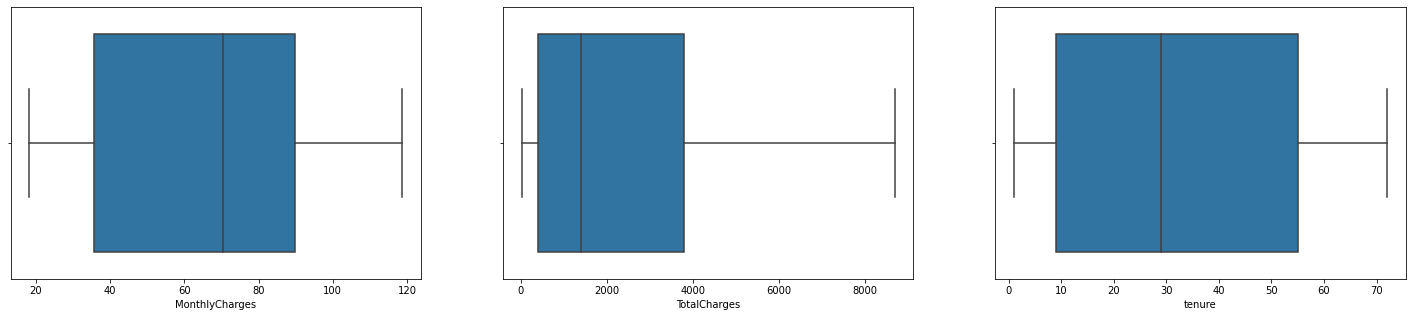

In [24]:
fig = plt.figure(figsize=(25,5))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(x=df['MonthlyCharges'])

fig.add_subplot(row, col, 2)
sns.boxplot(x=df['TotalCharges'])

fig.add_subplot(row, col, 3)
sns.boxplot(x=df['tenure'])

Berdasarkan boxplot pada 3 kolom numerikal diatas terlihat tidak ada outliers.

----

In [25]:
# get data for model inference
df_inf = df.sample(20, random_state=95)
df_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4564,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.00,20.00,1
4233,No,Yes,No,33,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),59.55,2016.30,0
1955,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.40,4613.95,0
3949,No,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,0
2427,No,No,No,1,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,35.90,35.90,1
6574,Yes,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,816.80,0
6107,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.95,19.95,0
4362,No,Yes,No,49,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),20.70,1032.05,0
6489,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,18.85,18.85,1
2885,Yes,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.10,7839.85,0


Mengambil 10 data inference untuk nantinya diuji coba terhadap model yang sudah dibuat.

In [26]:
df_train_test = df.drop(df_inf.index)
df_train_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Data yang telah dipisahkan dari 10 data inference disimpan dalam variabel df_train_test

In [27]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

Reset index dari kedua dataframe yang telah dipisahkan.

### Splitting Dataset

In [28]:
X = df_train_test.drop('Churn',axis = 'columns')
y = df_train_test['Churn']

X_, X_test, y_, y_test = train_test_split(X, y, random_state = 22, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, random_state = 22, test_size = 0.8)

Splitting menjadi train-test set dan juga validation set.

In [29]:
cat_col = X.select_dtypes(include=['object']).columns
num_col = X.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
categorical Columns: Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


Memisahkan kolom-kolom numerik dan kategorik ke variabel masing-masing untuk persiapan piple preprocessing.

In [30]:
X.skew()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16096\1164782681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew()


tenure            0.237635
MonthlyCharges   -0.222220
TotalCharges      0.961901
dtype: float64

Nilai skewness tergolong kecil sehingga bisa dikatakan data terdistribusi normal.

In [31]:
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder())
])

Pembuatan pipeline encoding dan scaling. Untuk kolom numerikal di scaling menggunakan standard scaler karena kolom-kolom terbilang terdistribusi normal. Untuk kolom kategorik menggunakan OneHotEncoder.

***Pipeline Preprocessor***

In [32]:
preprocessor =  ColumnTransformer([
    ('numeric', numerical_pipeline,['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('category', categorical_pipeline,['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                       'Contract', 'PaperlessBilling', 'PaymentMethod'])
])

Melakukan columntransformer setelah scaling dan encoding.

In [33]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

Proses untuk X_train saja.

In [34]:
X_train_prep = preprocessor.transform(X_train)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

Proses transform untuk X_train, X_val, dan X_test.

***Pipeline Tensorflow***

In [35]:
# Train Program

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_prep, y_train))
train_dataset = train_dataset.shuffle(buffer_size=128).batch(64)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_prep, y_test))
test_dataset = test_dataset.batch(64)

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_prep, y_val))
val_dataset = val_dataset.batch(64)

Membuat tensorflow pipeline data train, test dan val. Pada data train dilakukan shuffle dan ada batch sebesar 64. Batch sebanyak 64 juga ada pada validation dan test dataset.

----

### *Sequential Before Improvement*

#### **- Model Definition**

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(37,)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))

Membuat model sequential awal dengan 1 input layer, 3 hidden layer dan 1 output layer. Dibuat juga callback earlystopping dengan patience 10.

In [37]:
model.compile(loss='binary_crossentropy' ,
              optimizer='adam',#learning_rate=0.15, clipvalue=1.0),
              metrics=['accuracy'])

Proses compile dengan memasukkan loss=binary_crossentropy dan metrics=accuracy karena target yang akan diprediksi bersifat binary dan klasifikasi.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


Summary dari model sequential API yang belum diimprove.

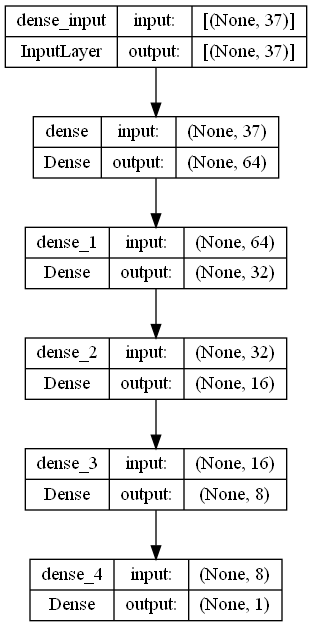

In [39]:
plot_model(model, show_shapes= True)

Gambaran dari layer-layer Sequential API

----

#### **- Model Training**

In [40]:
history = model.fit(train_dataset, epochs=100,
                    validation_data=val_dataset,verbose=1, callbacks=[callback])

Epoch 1/100
20/20 [==============================] - 3s 36ms/step - loss: 2.5470 - accuracy: 0.6981 - val_loss: 1.7536 - val_accuracy: 0.7298
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 1.9555 - accuracy: 0.7433 - val_loss: 2.5236 - val_accuracy: 0.7405
Epoch 3/100
20/20 [==============================] - 0s 14ms/step - loss: 1.7291 - accuracy: 0.7520 - val_loss: 1.2180 - val_accuracy: 0.7843
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 1.5434 - accuracy: 0.7710 - val_loss: 1.3856 - val_accuracy: 0.7561
Epoch 5/100
20/20 [==============================] - 0s 16ms/step - loss: 2.2216 - accuracy: 0.6941 - val_loss: 1.7500 - val_accuracy: 0.7736
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 2.9290 - accuracy: 0.7441 - val_loss: 2.9514 - val_accuracy: 0.7468
Epoch 7/100
20/20 [==============================] - 0s 15ms/step - loss: 2.5878 - accuracy: 0.7512 - val_loss: 1.7356 - val_accuracy: 0.7789
Epoch 

Model di train pada train dataset dan juga dilakukan validasi.

----

#### **- Model Evaluation**

In [41]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.546978,0.698098,1.753578,0.729794
1,1.955471,0.743265,2.523576,0.740491
2,1.729143,0.751981,1.217963,0.784271
3,1.543428,0.770998,1.385551,0.756141
4,2.221647,0.694136,1.749964,0.773574


Metrics accuracy hasil dari training dibuat ke dalam dataframe

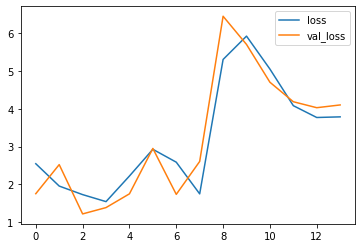

In [42]:
metrics[['loss','val_loss']].plot();

Plotting metrics sequential yang belum diimprove, terlihat ada gradient exploding di epoch 18.

----

### *Sequential After Improvement*

#### **- Model Definition**

In [43]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(64, input_shape=(37,), activation='sigmoid', kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(tf.keras.layers.Dense(32, activation='tanh', kernel_initializer='glorot_normal'))
# model2.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

model2.add(tf.keras.layers.Dense(16, activation='tanh',  kernel_initializer='glorot_normal'))
# model2.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

model2.add(tf.keras.layers.Dense(8, activation='tanh',  kernel_initializer='glorot_normal'))
# model2.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

model2.add(tf.keras.layers.Dense(4, activation='tanh',  kernel_initializer='glorot_normal'))
# model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(1, activation='relu', kernel_initializer='he_normal'))

Improve model sequential dengan menambahkan :
- activation sigmoid, regularizerL2(0.001), dan initializer glorot_normal pada input layer
- activation tanh, initializer=glorot_normal ,regularizerL2 pada hidden layer, ditambahkan juga 1 tambahan hidden layer menjadi 4 hidden layer
- activation relu, initializer he_normal regularizerL2 pada output layer

In [44]:
model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001 ), metrics=['accuracy'])

Proses compile juga ada improvement dengan menambahkan learningrate=0.0001 pada optimizers Adam.

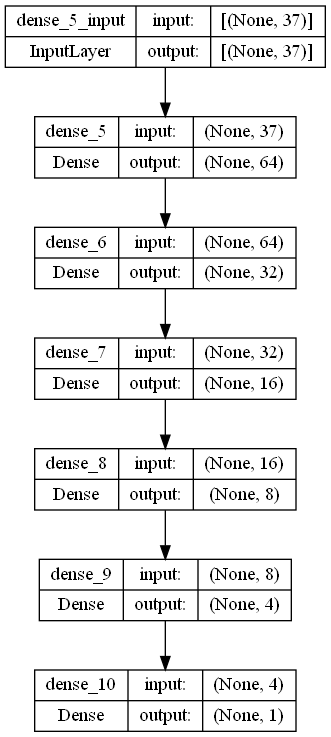

In [45]:
plot_model(model2, show_shapes= True)

Summary dari model sequential API yang sudah diimprove.

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2432      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5,217
Trainable params: 5,217
Non-traina

Gambaran dari layer-layer Sequential API

#### **- Model Training**

In [47]:
history3 = model2.fit(train_dataset, epochs=100,
                    validation_data=val_dataset, verbose=1, callbacks=[callback])

Epoch 1/100
20/20 [==============================] - 2s 31ms/step - loss: 0.6819 - accuracy: 0.6918 - val_loss: 0.6430 - val_accuracy: 0.7169
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6491 - accuracy: 0.7187 - val_loss: 0.6161 - val_accuracy: 0.7349
Epoch 3/100
20/20 [==============================] - 0s 15ms/step - loss: 0.6235 - accuracy: 0.7266 - val_loss: 0.5939 - val_accuracy: 0.7355
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5997 - accuracy: 0.7266 - val_loss: 0.5726 - val_accuracy: 0.7355
Epoch 5/100
20/20 [==============================] - 0s 14ms/step - loss: 0.5773 - accuracy: 0.7266 - val_loss: 0.5524 - val_accuracy: 0.7355
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 0.5656 - accuracy: 0.7250 - val_loss: 0.5719 - val_accuracy: 0.7653
Epoch 7/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5864 - accuracy: 0.7702 - val_loss: 0.5712 - val_accuracy: 0.7647
Epoch 

Proses fit model sequential yang telah diimprove

#### **- Model Evaluation**

In [48]:
metrics3 = pd.DataFrame(history3.history)
metrics3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.681911,0.691759,0.642954,0.716918
1,0.649143,0.718700,0.616072,0.734945
2,0.623474,0.726624,0.593885,0.735539
3,0.599699,0.726624,0.572646,0.735539
4,0.577273,0.726624,0.552416,0.735539


Metrics accuracy hasil dari training dibuat ke dalam dataframe

(0.4, 0.9)

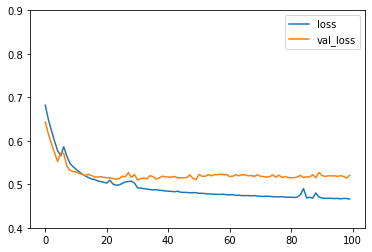

In [49]:
metrics3[['loss','val_loss']].plot()
plt.ylim(0.4,0.9)

Plotting metrics sequential yang sudah diimprove, terlihat sudah tidak ada gradient exploding. Model mulai good fit di sekitar epoch 10. Ketika epoch makin banyak makin melebar garisnya adalah hal wajar karena model semakin kompleks.

----

### *Functional API Before Improvement*

#### **- Model Definition**

In [50]:
input_ = keras.layers.Input(shape=(37,))
hidden1 = keras.layers.Dense(32, activation="relu")(input_)
hidden2 = keras.layers.Dense(16, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
modelfunc = keras.models.Model(inputs=[input_], outputs=[output])

Membuat model functional awal dengan 1 input layer, 2 hidden layer dan 1 output layer. Pada 2 hidden layer menggunakan activation 'relu'

In [51]:
modelfunc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 32)           1216        ['input_1[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 16)           528         ['dense_11[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 53)           0           ['input_1[0][0]',                
                                                                  'dense_12[0][0]']           

Summary dari model sequential API yang belum diimprove.

In [52]:
modelfunc.compile(loss='binary_crossentropy' , optimizer='Adam',metrics=['accuracy'])

# mse_test = model.evaluate(X_test_trf, y_test)
# y_pred = model.predict(X_test_trf)

Proses compile dengan memasukkan loss=binary_crossentropy dan metrics=accuracy karena target yang akan diprediksi bersifat binary dan klasifikasi.

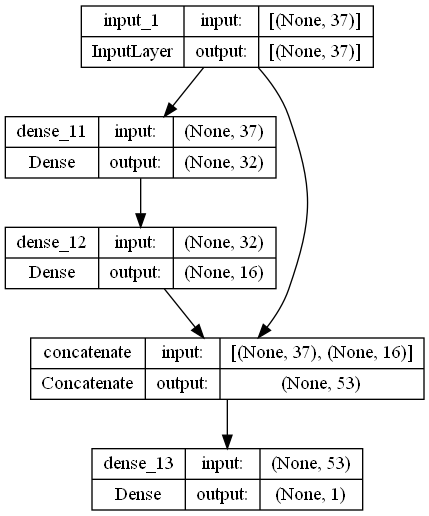

In [53]:
plot_model(modelfunc, show_shapes= True)

Gambaran dari layer-layer Sequential API

#### **- Model Training**

In [54]:
history2 = modelfunc.fit(train_dataset,epochs=100,
                    validation_data=val_dataset,verbose=1, callbacks=[callback])

Epoch 1/100
20/20 [==============================] - 2s 32ms/step - loss: 5.5050 - accuracy: 0.4184 - val_loss: 4.6071 - val_accuracy: 0.5297
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 4.4305 - accuracy: 0.5531 - val_loss: 4.1144 - val_accuracy: 0.6317
Epoch 3/100
20/20 [==============================] - 0s 14ms/step - loss: 4.0470 - accuracy: 0.6046 - val_loss: 3.9835 - val_accuracy: 0.6169
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 3.8912 - accuracy: 0.6101 - val_loss: 3.8869 - val_accuracy: 0.6521
Epoch 5/100
20/20 [==============================] - 0s 14ms/step - loss: 3.7949 - accuracy: 0.6371 - val_loss: 3.7957 - val_accuracy: 0.6575
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 3.7130 - accuracy: 0.6371 - val_loss: 3.7324 - val_accuracy: 0.6638
Epoch 7/100
20/20 [==============================] - 0s 14ms/step - loss: 3.6814 - accuracy: 0.6521 - val_loss: 3.7106 - val_accuracy: 0.6747
Epoch 

Model di train pada train dataset dan juga dilakukan validasi.

In [55]:
# y_pred = model.predict(X_test_trf)
# y_pred = np.where(y_pred > 0.5, 1, 0).squeeze()
# print(classification_report(y_test, y_pred.round()))

#### **- Model Evaluation**

In [56]:
metrics2 = pd.DataFrame(history2.history)
metrics2.head()

,loss,accuracy,val_loss,val_accuracy
0,5.504964,0.418384,4.607136,0.529715
1,4.430527,0.553090,4.114417,0.631735
2,4.047033,0.604596,3.983510,0.616878
3,3.891168,0.610143,3.886907,0.652139
4,3.794898,0.637084,3.795741,0.657488


Metrics accuracy hasil dari training dibuat ke dalam dataframe

<AxesSubplot:>

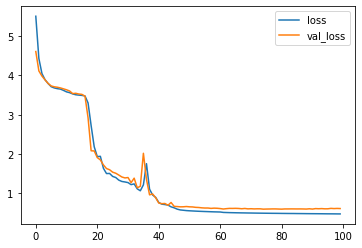

In [57]:
metrics2[['loss','val_loss']].plot()

Berdasarkan plotting loss val_loss di model functional sebelum diimprove terlihat sudah sedikit good fit, ada sedikit gradient exploding di epoch 17.

----

### *Functional API After Improvement*

#### **- Model Definition**

In [58]:
input2_ = keras.layers.Input(shape=(37,))
hidden21 = keras.layers.Dense(32, activation="relu", kernel_initializer='he_normal')(input2_)
hidden22 = keras.layers.Dense(16, activation="relu", kernel_initializer='he_normal')(hidden21)
hidden23 = keras.layers.Dense(8, activation="relu", kernel_initializer='he_normal')(hidden22)
hidden24 = keras.layers.Dense(4, activation="relu", kernel_initializer='he_normal')(hidden23)
concat2 = keras.layers.concatenate([input2_, hidden24])
output2 = keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(), kernel_initializer='glorot_normal')(concat2)
modelfunc2 = keras.models.Model(inputs=[input2_], outputs=[output2])

Improve model functional dengan menambahkan :
- activation relu, regularizerL2(0.001), dan initializer glorot_normal pada input layer
- activation relu, initializer=glorot_normal ,regularizerL2 pada hidden layer, ditambahkan juga 1 tambahan hidden layer menjadi 4 hidden layer
- activation relu, initializer he_normal regularizerL2 pada output layer

In [59]:
modelfunc2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 32)           1216        ['input_2[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 16)           528         ['dense_14[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, 8)            136         ['dense_15[0][0]']               
                                                                                            

Summary dari model functional API yang sudah diimprove.

In [60]:
modelfunc2.compile(loss='binary_crossentropy' , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

# mse_test = model.evaluate(X_test_trf, y_test)
# y_pred = model.predict(X_test_trf)

Proses compile juga ada improvement dengan menambahkan learningrate=0.0001 pada optimizers Adam.

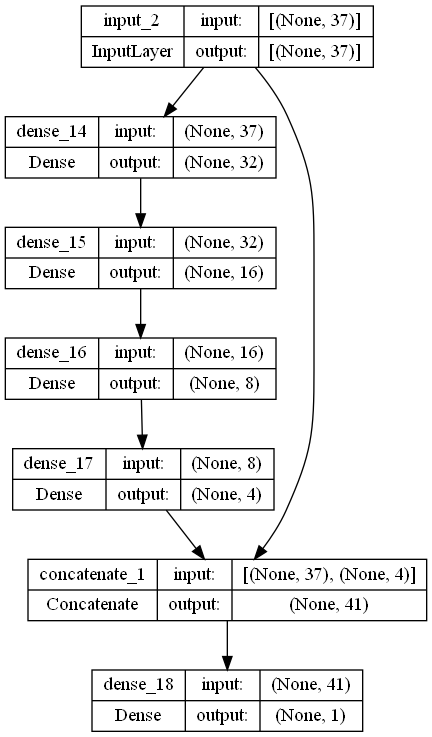

In [61]:
plot_model(modelfunc2, show_shapes= True)

Gambaran dari layer-layer functional API

#### **- Model Training**

In [62]:
history4 = modelfunc2.fit(train_dataset, epochs=100,
                    validation_data=val_dataset, verbose=1, callbacks=[callback])

Epoch 1/100
20/20 [==============================] - 2s 27ms/step - loss: 0.6140 - accuracy: 0.6616 - val_loss: 0.6244 - val_accuracy: 0.6414
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 0.6095 - accuracy: 0.6688 - val_loss: 0.6194 - val_accuracy: 0.6470
Epoch 3/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6050 - accuracy: 0.6712 - val_loss: 0.6143 - val_accuracy: 0.6513
Epoch 4/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6005 - accuracy: 0.6712 - val_loss: 0.6094 - val_accuracy: 0.6559
Epoch 5/100
20/20 [==============================] - 0s 13ms/step - loss: 0.5961 - accuracy: 0.6735 - val_loss: 0.6044 - val_accuracy: 0.6603
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 0.5917 - accuracy: 0.6775 - val_loss: 0.5996 - val_accuracy: 0.6628
Epoch 7/100
20/20 [==============================] - 0s 14ms/step - loss: 0.5873 - accuracy: 0.6775 - val_loss: 0.5947 - val_accuracy: 0.6672
Epoch 

Proses fit model sequential yang telah diimprove

#### **- Model Evaluation**

In [63]:
metrics4 = pd.DataFrame(history4.history)
metrics4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.614043,0.661648,0.624376,0.641442
1,0.609515,0.668780,0.619360,0.646989
2,0.605046,0.671157,0.614297,0.651347
3,0.600524,0.671157,0.609362,0.655903
4,0.596132,0.673534,0.604380,0.660262


Metrics accuracy hasil dari training dibuat ke dalam dataframe

<AxesSubplot:>

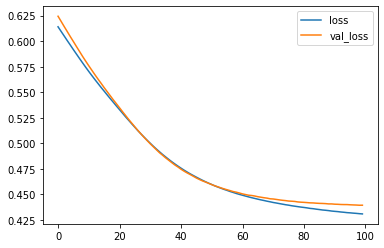

In [64]:
metrics4[['loss','val_loss']].plot()

Plotting metrics functional yang sudah diimprove, terlihat sudah tidak ada gradient exploding. Model mulai good fit di sekitar epoch 65 dengan nilai loss rendah dan mulai stabil.

----

## Model Improvement With SMOTE

In [65]:
balancing = SMOTE(random_state=3, sampling_strategy = 'minority')

Membuat variabel balancing smote

In [66]:
X_train_oversampling, y_train_oversampling = balancing.fit_resample(X_train_prep, y_train)
X_test_oversampling, y_test_oversampling = balancing.fit_resample(X_test_prep, y_test)
X_val_oversampling, y_val_oversampling = balancing.fit_resample(X_val_prep, y_val)

Balancing pada data train test val

#### **- Model Definition**

In [67]:
modelsmote = tf.keras.models.Sequential()
modelsmote.add(tf.keras.layers.Dense(64, input_shape=(37,), activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelsmote.add(tf.keras.layers.Dense(32, activation='sigmoid'))
# model2.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

modelsmote.add(tf.keras.layers.Dense(16, activation='sigmoid'))
# modelsmote.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

modelsmote.add(tf.keras.layers.Dense(8, activation='sigmoid'))
# modelsmote.add(tf.keras.layers.BatchNormalization()) #contoh normalisasi sebelum activation

modelsmote.add(tf.keras.layers.Dense(4, activation='sigmoid'))
# modelsmote.add(tf.keras.layers.BatchNormalization())

modelsmote.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

Improve model sequential dengan menambahkan :
- activation relu, regularizerL2(0.001), dan initializer he_normal pada input layer
- activation sigmoid, initializer=sigmoid ,regularizerL2 pada hidden layer, ditambahkan juga 1 tambahan hidden layer menjadi 4 hidden layer
- activation sigmoid, initializer glorot_normal regularizerL2(0.001) pada output layer

In [68]:
modelsmote.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

Proses compile juga ada improvement dengan menambahkan learningrate=0.0001 pada optimizers Adam.

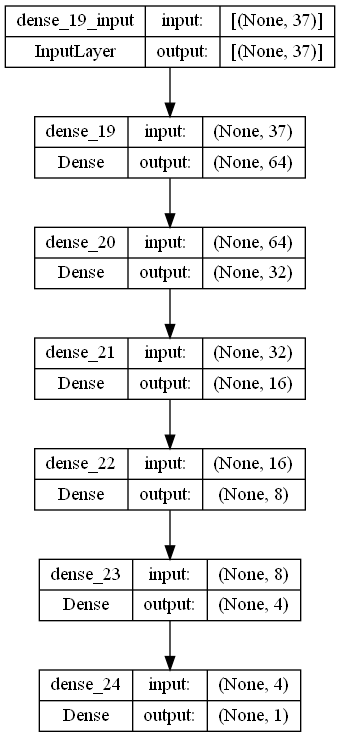

In [69]:
plot_model(modelsmote, show_shapes= True)

In [70]:
historysmote = modelsmote.fit(X_train_oversampling, y_train_oversampling, epochs=100,
                    validation_data=(X_val_oversampling,y_val_oversampling), verbose=1, callbacks=[callback])

Epoch 1/100
58/58 [==============================] - 2s 16ms/step - loss: 0.8356 - accuracy: 0.5000 - val_loss: 0.8311 - val_accuracy: 0.5000
Epoch 2/100
58/58 [==============================] - 1s 10ms/step - loss: 0.8272 - accuracy: 0.5000 - val_loss: 0.8231 - val_accuracy: 0.5000
Epoch 3/100
58/58 [==============================] - 1s 9ms/step - loss: 0.8195 - accuracy: 0.5000 - val_loss: 0.8157 - val_accuracy: 0.5000
Epoch 4/100
58/58 [==============================] - 1s 10ms/step - loss: 0.8124 - accuracy: 0.5000 - val_loss: 0.8088 - val_accuracy: 0.5000
Epoch 5/100
58/58 [==============================] - 1s 11ms/step - loss: 0.8058 - accuracy: 0.5000 - val_loss: 0.8027 - val_accuracy: 0.5000
Epoch 6/100
58/58 [==============================] - 1s 11ms/step - loss: 0.7998 - accuracy: 0.5000 - val_loss: 0.7970 - val_accuracy: 0.5000
Epoch 7/100
58/58 [==============================] - 1s 11ms/step - loss: 0.7942 - accuracy: 0.5000 - val_loss: 0.7915 - val_accuracy: 0.5000
Epoch 8

Proses fit model sequential yang telah diimprove paramater dan smote balancing

#### **- Model Evaluation**

In [71]:
metricssmote = pd.DataFrame(historysmote.history)
metricssmote.head()

,loss,accuracy,val_loss,val_accuracy
0,0.835645,0.5,0.831125,0.5
1,0.827170,0.5,0.823126,0.5
2,0.819504,0.5,0.815695,0.5
3,0.812390,0.5,0.808793,0.5
4,0.805757,0.5,0.802690,0.5


Metrics accuracy hasil dari training dibuat ke dalam dataframe

<AxesSubplot:>

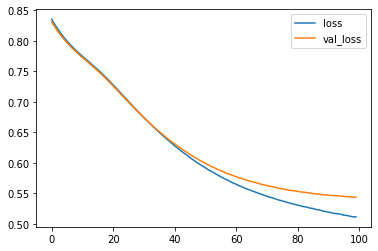

In [72]:
metricssmote[['loss','val_loss']].plot()
# plt.ylim(0.4,0.9)

Berdasarkan grafik loss val_loss diatas terlihat good fit sampai epoch 50. Untuk setelah 50 model menjadi terlalu kompleks sehingga mulai overfitting

Hasil prediksi dengan improve parameter dan smote balancing memberikan nilai yang jauh lebih baik dibandingkan dengan model-model sebelumnya.

----

## **EVALUATION**

Text(0.5, 1.0, 'Functional After Improvement')

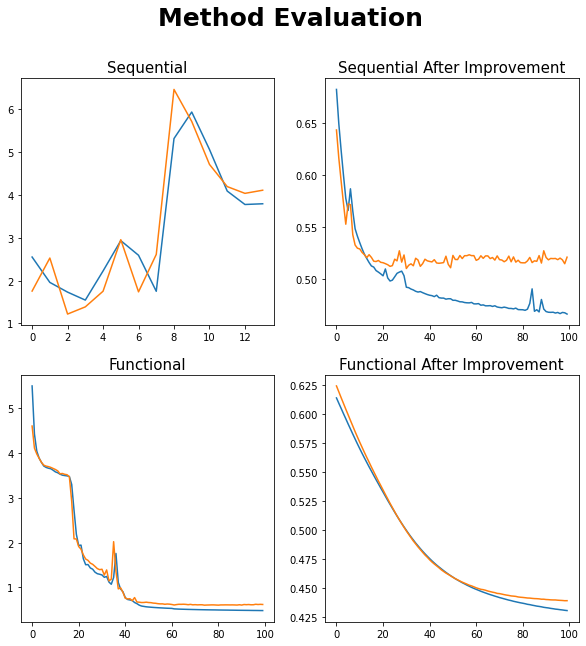

In [73]:
# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Method Evaluation', fontsize=25, weight='bold')

ax1.plot(metrics.index, metrics['loss'], label='Train')
ax1.plot(metrics.index, metrics['val_loss'], label='Validation')
ax1.set_title('Sequential', fontsize =15)

ax2.plot(metrics3.index, metrics3['loss'], label='Train')
ax2.plot(metrics3.index, metrics3['val_loss'], label='Validation')
ax2.set_title('Sequential After Improvement', fontsize =15)

ax3.plot(metrics2.index, metrics2['loss'], label='Train')
ax3.plot(metrics2.index, metrics2['val_loss'], label='Validation')
ax3.set_title('Functional', fontsize =15)

ax4.plot(metrics4.index, metrics4['loss'], label='Train')
ax4.plot(metrics4.index, metrics4['val_loss'], label='Validation')
ax4.set_title('Functional After Improvement', fontsize =15)

Dari hasil plotting 4 model diatas, terlihat kalau model Functional yang sudah diimprove adalah model yang paling goodfit.

In [74]:
y_pred_seq = model.predict(X_test_prep)
y_pred_seq = np.where(y_pred_seq > 0.5, 1, 0).squeeze()

y_pred_seqimp = model2.predict(X_test_prep)
y_pred_seqimp = np.where(y_pred_seqimp > 0.5, 1, 0).squeeze()

y_pred_fun = modelfunc.predict(X_test_prep)
y_pred_fun = np.where(y_pred_fun > 0.5, 1, 0).squeeze()

y_pred_funimp = modelfunc2.predict(X_test_prep)
y_pred_funimp = np.where(y_pred_funimp > 0.5, 1, 0).squeeze()

print(classification_report(y_test, y_pred_seq.round()))
print(classification_report(y_test, y_pred_seqimp.round()))


22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       519
           1       0.43      0.83      0.57       183

    accuracy                           0.67       702
   macro avg       0.67      0.72      0.65       702
weighted avg       0.79      0.67      0.69       702

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       519
           1       0.61      0.52      0.56       183

    accuracy                           0.79       702
   macro avg       0.72      0.70      0.71       702
weighted avg       0.78      0.79      0.78       702



In [75]:
print(classification_report(y_test, y_pred_fun.round()))
print(classification_report(y_test, y_pred_funimp.round()))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       519
           1       0.54      0.53      0.54       183

    accuracy                           0.76       702
   macro avg       0.69      0.69      0.69       702
weighted avg       0.76      0.76      0.76       702

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       519
           1       0.59      0.51      0.55       183

    accuracy                           0.78       702
   macro avg       0.71      0.69      0.70       702
weighted avg       0.77      0.78      0.77       702



In [76]:
y_pred_smote= modelsmote.predict(X_test_oversampling)
y_pred_smote = np.where(y_pred_smote > 0.5, 1, 0).squeeze()

print(classification_report(y_test_oversampling, y_pred_smote.round()))

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       519
           1       0.71      0.81      0.76       519

    accuracy                           0.74      1038
   macro avg       0.74      0.74      0.74      1038
weighted avg       0.74      0.74      0.74      1038



Pada analisis ini akan lebih memperhatikan nilai Precision, karena nilai False Positif lebih merugikan dimana ketika seorang customer terdeteksi churn (tidak lagi menggunakan produk) tapi sebenarnya masih menggunakan produk.

**Model terbaik berdasarkan nilai precision terbaik adalah Sequential After Improvement dengan SMOTE Balancing. Nilai presisi yang lebih baik pada model tersebut didapatkan karena adanya balancing pada data**

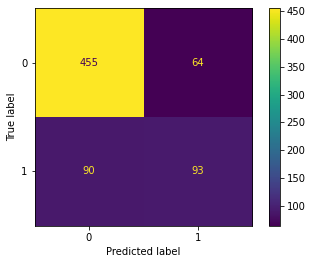

In [77]:
cm = confusion_matrix(y_test,y_pred_funimp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Dari hasil confusion matrix bisa kita lihat jumlah False Positif tidak beda jauh dengan True Positif.

----

## **MODEL SAVING**

In [78]:
model2.save('modelseqimp.h5')

modelsmote.save('modelsmote.h5')

with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

with open('list_num_columns.txt', 'w') as file_2:
  file_2.write(str(num_col))

with open('list_cat_columns.txt', 'w') as file_3:
  file_3.write(str(cat_col))

Menyimpan model-model dan list columns yang telah dibuat sebelumnya.

----

## **MODEL LOADING**

In [79]:
# Load All Files

# Load saved model
modelseqimp = keras.models.load_model('modelseqimp.h5')

modelsmoteinf = keras.models.load_model('modelsmote.h5')
  
with open('preprocessor.pkl', 'rb') as file_1:
  preprocessor = pickle.load(file_1)

with open('list_num_columns.txt', 'r') as file_2:
  list_num_columns = file_2.read()

with open('list_cat_columns.txt', 'r') as file_3:
  list_cat_columns = file_3.read()

Load model yang telah dibuat.

### ***INFERENCE***

In [80]:
df_pred_inf = preprocessor.transform(df_inf)

In [82]:
df_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.00,20.00,1
1,No,Yes,No,33,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),59.55,2016.30,0
2,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.40,4613.95,0
3,No,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,0
4,No,No,No,1,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,35.90,35.90,1
5,Yes,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,816.80,0
6,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.95,19.95,0
7,No,Yes,No,49,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),20.70,1032.05,0
8,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,18.85,18.85,1
9,Yes,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.10,7839.85,0


Melakukan preprocessing terhadap data inference.

In [ ]:
y_pred_inf_seqimp = modelseqimp.predict(df_pred_inf)

1/1 [==============================] - 0s 168ms/step


Proses predict churn berdasarkan model yang telah dibuat sebelumnya. Penggunaan Model Sequential yang telah diimprove (tanpa smote balancing) karena df_inf datanya tidak balance

In [ ]:
y_pred_inf_seqimp = np.where(y_pred_inf_seqimp > 0.5, 1, 0)
print(classification_report(df_inf['Churn'], y_pred_inf_seqimp.round()))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.75      0.50      0.60         6

    accuracy                           0.80        20
   macro avg       0.78      0.71      0.73        20
weighted avg       0.79      0.80      0.79        20



Berdasarkan classification report didapatkan nilai presisi sebesar 75%. Nilai tersebut tidak terlalu bagus karena masih ada 25% error yang cukup besar.

In [ ]:
y_pred_inf_seqimp_df = pd.DataFrame(y_pred_inf_seqimp, columns=['ChurnPrediction'])
y_pred_inf_seqimp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ChurnPrediction  20 non-null     int32
dtypes: int32(1)
memory usage: 208.0 bytes


Membuat hasil prediksi data inference ke dalam dataframe.

In [ ]:
pd.concat([df_inf, y_pred_inf_seqimp_df], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnPrediction
0,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.00,20.00,1,0
1,No,Yes,No,33,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),59.55,2016.30,0,0
2,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.40,4613.95,0,0
3,No,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,0,0
4,No,No,No,1,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,35.90,35.90,1,1
5,Yes,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,816.80,0,1
6,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.95,19.95,0,0
7,No,Yes,No,49,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),20.70,1032.05,0,0
8,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,18.85,18.85,1,0
9,Yes,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.10,7839.85,0,0


Setelah digabungkan dengan data asalnya bisa kita lihat langsung pada bagian mana saja prediksi yang benar dan salah.

----

## **KESIMPULAN**

Pada pembuatan model kali ini didapati bahwa pada kolom-kolom dataset tidak semuanya digunakan karena tidak berpengaruh dalam prediksi Churn. Kolom CustomerID dan Gender didrop dalam pemodelan ini. Setelah data dibersihkan, dibuat beberapa model training. Data churn imbalance sehingga bisa diprediksi nilai precision atau recallnya akan kurang baik pada target. Ada model training dengan sequential dan functional API dengan base parameter lalu ada juga dengan improvement pada kedua model tersebut.

Nilai Precision adalah nilai yang menjadi perhatian dalam pembuatan model ini karena nilai False Positif lebih merugikan dimana ketika seorang customer terdeteksi churn (tidak lagi menggunakan produk) tapi sebenarnya masih menggunakan produk. Diharapkan model ini bisa sangat meminimalisasi False Positif.

Dari 4 model yang telah dilatih, model Sequential API dengan improvement menjadi model terbaik namun nilai precision yang didapatkan hanya 61%. Presisinya bisa dikatakan kurang baik karena bisa salah prediksi sampai 39%.

Karena model sebelumnya kurang memberikan nilai presisi yang baik, dicoba improvement selanjutnya dengan menyeimbangkan data menggunakan SMOTE Balancing pada dataset. Terlihat hasilnya cukup naik signifikan dengan Precision 71%. Untuk model prediksi sebetulnya masih dianggap kurang bila belum menyentuh angka 95%. Setidaknya sudah tergambarkan bagaimana cara-cara untuk meningkatkan Precision dalam prediksi Churn.

Setelah train test dan evaluasi, dicoba kembali untuk memprediksi data inference yang telah dipisahkan di awal sebanyak 20 row data. Prediksi menggunakan model Sequential API yang telah diimprove tanpa ada SMOTE Balancing data. Hasil presisi yang didapat sebesar 75%

Saran untuk meningkatkan kualitas dari model :<br>
1. Balancing data
2. Mencoba lebih banyak kombinasi parameter-parameter untuk model improvement